# FP

In [1]:
# import
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
import seaborn as sns

In [39]:
config = [
    'final_A_combined',
    'final_B_combined',
    'final_C_combined',
    'final_D_combined',
    'final_E_combined',
    'final_F_combined'
]

In [35]:
#!pwd
#os.chdir("/home/howhang/omnetpp-6.0-linux-x86_64/omnetpp-6.0/samples/omnetpp/validation_paper/simulations")
#!pwd

In [ ]:
os.chdir("/home/howhang/omnet_validation/workspace/network_validation/simulations")
command_run = "../network_validation --sim-time-limit 0.1s -r 0 -m -u Cmdenv -c {} -n .:../src:../../../../inet4.4/examples:../../../../inet4.4/showcases:../../../../inet4.4/src:../../../../inet4.4/tests/validation:../../../../inet4.4/tests/networks:../../../../inet4.4/tutorials -x inet.common.selfdoc;inet.linklayer.configurator.gatescheduling.z3;inet.emulation;inet.showcases.visualizer.osg;inet.examples.emulation;inet.showcases.emulation;inet.transportlayer.tcp_lwip;inet.applications.voipstream;inet.visualizer.osg;inet.examples.voipstream --image-path=../../../../inet4.4/images -l ../../../../inet4.4/src/INET omnetpp.ini"
for i in config:
    os.system(command_run.format(i))

## FP plot

In [1]:
import os
os.chdir("/home/howhang/omnet_validation/plot")
!pwd

/home/howhang/omnet_validation/plot


In [2]:
# In[1]:
from utils.parsePcap import TsnParsePcap
from utils.createPlot import TsnCreatePlot
from pandas import read_csv, concat, cut
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# In[92]:
CONFIGURATION = {
    "OMNeT++": {
                     "A": "omnet_robotic-NULL-NULL_final-A_1518_200.0percent.pcap",
                     "B": "omnet_robotic-NULL-NULL_final-B_1518_200.0percent.pcap",
                     "C": "omnet_robotic-NULL-NULL_final-C_1518_200.0percent.pcap",
                     "D": "omnet_robotic-NULL-NULL_final-D_1518_200.0percent.pcap",
                     "E": "omnet_robotic-NULL-NULL_final-E_1518_200.0percent.pcap",
                     "F": "omnet_robotic-NULL-NULL_final-F_1518_200.0percent.pcap",
    }
}

SOURCE_PATH_ROOT = "../workspace/network_validation/simulations/results/final"
OUTPUT_PATH_ROOT = "./"
mapping = {2: "robotic"}

In [5]:
# In[103]:
dfs = []

for vendor, config in CONFIGURATION.items():
    for qos, pcap in config.items():
        input_path = "{}/{}".format(SOURCE_PATH_ROOT, pcap)
        output_path = "{}/{}/{}".format(OUTPUT_PATH_ROOT, vendor, qos)
        pp = TsnParsePcap(path=input_path,
                          mapping=mapping,
                          output_path=output_path,
                          omnet_ts=True)
        pp.pcap_to_dfs()
        d = pp.get_dfs()
        dfs.append(d)

        cp = TsnCreatePlot(dfs=d,
                           output_path=output_path,
                           mapping=mapping,
                           bg_load=0,
                           bg_framesize=1518,
                           qos_type="None")
        cp.generate_plots(plot_type="latency_over_time", output="csv")
        # cp.generate_plots(plot_type="latency_ccdf", output="mpl")


sh: 1: tshark: not found
sh: 1: tshark: not found
sh: 1: tshark: not found
sh: 1: tshark: not found
sh: 1: tshark: not found
sh: 1: tshark: not found


In [6]:
dfs = []

for vendor, config in CONFIGURATION.items():
    for qos, pcap in config.items():
        filepath = "{}/{}/{}/csv/latency_over_time_robotic.csv".format(OUTPUT_PATH_ROOT, vendor, qos)
        print(filepath)
        df = read_csv(filepath)        
        df = df[["Latency (ns)"]]
        df.rename(columns={"Latency (ns)": "x-{}-{}".format(vendor, qos)},errors="raise",inplace=True)
        dfs.append(df)
del df
#df.describe()
df = concat(dfs,
            axis=1,
            join="outer",
            ignore_index=False)

del dfs
# change ps to us
df = df * 10**-6
df.describe()

.//OMNeT++/A/csv/latency_over_time_robotic.csv
.//OMNeT++/B/csv/latency_over_time_robotic.csv
.//OMNeT++/C/csv/latency_over_time_robotic.csv
.//OMNeT++/D/csv/latency_over_time_robotic.csv
.//OMNeT++/E/csv/latency_over_time_robotic.csv
.//OMNeT++/F/csv/latency_over_time_robotic.csv


,x-OMNeT++-A,x-OMNeT++-B,x-OMNeT++-C,x-OMNeT++-D,x-OMNeT++-E,x-OMNeT++-F
count,4997.000000,4997.000000,4.997000e+03,4997.000000,4997.000000,4.997000e+03
mean,47.292702,19.172372,8.103000e+00,34.121376,14.378959,8.084500e+00
std,3.533260,3.536527,9.148102e-11,3.391600,3.538445,2.191897e-10
min,41.206000,12.638000,8.103000e+00,29.725500,8.186500,8.084500e+00
25%,44.230000,16.123000,8.103000e+00,30.873500,11.282500,8.084500e+00
50%,47.302000,19.147000,8.103000e+00,33.950500,14.408500,8.084500e+00
75%,50.326000,22.219000,8.103000e+00,36.993500,17.471500,8.084500e+00
max,53.398000,25.339000,8.103000e+00,41.621500,20.653500,8.084500e+00


In [6]:
df5 = pd.DataFrame(df["x-OMNeT++-A"]).assign(configuration="SF").assign(id='A')
df5.rename(columns={'x-OMNeT++-A': 'delay'}, inplace=True)
df6 = pd.DataFrame(df["x-OMNeT++-B"]).assign(configuration="CT").assign(id='B')
df6.rename(columns={'x-OMNeT++-B': 'delay'}, inplace=True)
df7 = pd.DataFrame(df["x-OMNeT++-C"]).assign(configuration="TAS+CT").assign(id='C')
df7.rename(columns={'x-OMNeT++-C': 'delay'}, inplace=True)
df8 = pd.DataFrame(df["x-OMNeT++-D"]).assign(configuration="FP+SF").assign(id='D')
df8.rename(columns={'x-OMNeT++-D': 'delay'}, inplace=True)
df9 = pd.DataFrame(df["x-OMNeT++-E"]).assign(configuration="FP+CT").assign(id='E')
df9.rename(columns={'x-OMNeT++-E': 'delay'}, inplace=True)
df10 = pd.DataFrame(df["x-OMNeT++-F"]).assign(configuration="FP+CT+TAS").assign(id='F')
df10.rename(columns={'x-OMNeT++-F': 'delay'}, inplace=True)
cdf = pd.concat([df5,df6,df7,df8,df9,df10]) 
mdf = pd.melt(cdf, id_vars=['configuration'])
mdf.set_flags(allows_duplicate_labels=False)

,configuration,variable,value
0,SF,delay,48.598
1,SF,delay,52.342
2,SF,delay,43.846
3,SF,delay,47.59
4,SF,delay,51.334
...,...,...,...
59959,FP+CT+TAS,id,F
59960,FP+CT+TAS,id,F
59961,FP+CT+TAS,id,F
59962,FP+CT+TAS,id,F


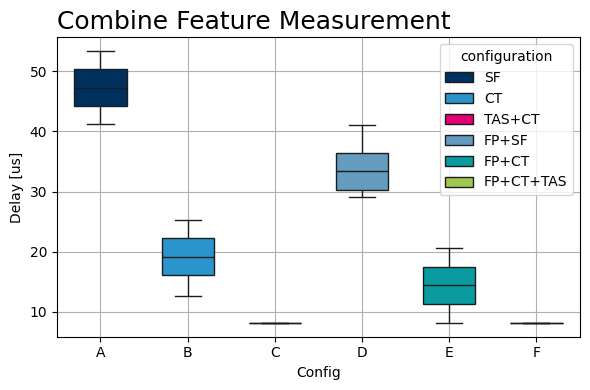

In [7]:
# # For combine feature box plot
# - A: no QoS, SF
# - B: no QoS, CT
# - C: TAS, CT
# - D: FP, SF
# - E: FP, CT
# - F: FP, TAS, CT

# In[105]:
cdf.reset_index(level=0, inplace=True)

colors = ["#00305d",  # TUD Blue 100%
          "#2C94CC",  # ComNets Middle Blue
          "#E20074",  # ComNets Magenta
          #"#192D64",
          # "#326491",
          "#649BBE",
          # "#A0DCF0",
          "#0A9BA0",
          # "#37B48C",
          "#A0C850",
          # "#CDDC28"
          ]

sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(6, 4))

plt.title("Combine Feature Measurement", loc='left', fontsize=18)
plt.title("", loc='right', fontsize=13, color='grey')
#plt.ylim(4800,5200)
sns.boxplot(x="id", y="delay",hue="configuration", data=cdf, fliersize=1, saturation=1, width=.6)

#sns.despine(offset=10, trim=True)

#plt.legend(bbox_to_anchor=(0.6, 0.85), loc='lower center', borderaxespad=0, ncol=3)

plt.grid(dict(visible=True,
              which='major',
              color='#CCD6DF',
              linestyle='-'))
plt.grid(dict(visible=True,
              which='minor',
              color='#CCD6DF',
              linestyle='--'))

ax.set_ylabel("Delay [us]")
ax.set_xlabel('Config')

plt.tight_layout()

#plt.savefig(OUTPUT_PATH_ROOT +'combineFeature.png', dpi=300)
plt.show()


# ## OMNeT++ vector approach
# - extract meanBitLifeTime vector

In [8]:
from matplotlib.cbook import boxplot_stats
from pandas import read_csv, concat, cut, DataFrame
dfs = {}

for arch, config in CONFIGURATION.items():
    dfs[arch] = {}
    for qos, pcap in config.items():
        input_path = "{}/{}".format(SOURCE_PATH_ROOT, pcap)
        output_path = "{}/{}/{}".format(OUTPUT_PATH_ROOT, arch, qos)
        pp = TsnParsePcap(path=input_path,
                          mapping=mapping,
                          output_path=output_path,
                          omnet_ts = True
                         )
        pp.pcap_to_dfs()
        d = pp.get_dfs()
        dfs[arch][qos] = d[0]

fp = []
counter = 0

qos = ["A",
       "B",
       "C",
       "D",
       "E",
       "F"]

arch = ["OMNeT++"]
        #,"SIM"]

for q in qos:
    for a in arch:
        print("QoS: {}, Arch: {}".format(q, a))
        df = dfs[a][q]["Latency (ns)"].astype(int)
        # for max and min
        df_describe = df
        df_describe = df_describe*10**-6
        print(df_describe.describe())
        s = boxplot_stats(df.values)[0]
        fp.append(DataFrame(s['fliers'].tolist(), columns=["Outlier-{}".format(counter)]))
        print("Outlier-{}".format(counter))
        print("lower whisker={},".format(s['whislo']*10**-6))
        print("lower quartile={},".format(s['q1']*10**-6))
        print("median={},".format(s['med']*10**-6))
        print("upper quartile={},".format(s['q3']*10**-6))
        print("upper whisker={}\n".format(s['whishi']*10**-6))
        counter += 1

outliers_df = concat(fp, axis=1)
outliers_df = outliers_df * 10 ** -6
outliers_df.to_csv("/home/howhang/Desktop/pgf-test-range/validation/boxplot_outlier/fp_outliers_omnet.csv", sep="\t", index=False)

sh: 1: tshark: not found
sh: 1: tshark: not found
sh: 1: tshark: not found
sh: 1: tshark: not found
sh: 1: tshark: not found
sh: 1: tshark: not found


QoS: A, Arch: OMNeT++
count    4997.000000
mean       47.292701
std         3.533260
min        41.205999
25%        44.229999
50%        47.301999
75%        50.326000
max        53.398000
Name: Latency (ns), dtype: float64
Outlier-0
lower whisker=41.205999,
lower quartile=44.229999,
median=47.301998999999995,
upper quartile=50.326,
upper whisker=53.397999999999996

QoS: B, Arch: OMNeT++
count    4997.000000
mean       19.172371
std         3.536527
min        12.637999
25%        16.122999
50%        19.146999
75%        22.219000
max        25.339000
Name: Latency (ns), dtype: float64
Outlier-1
lower whisker=12.637998999999999,
lower quartile=16.122999,
median=19.146998999999997,
upper quartile=22.218999999999998,
upper whisker=25.339

QoS: C, Arch: OMNeT++
count    4.997000e+03
mean     8.103000e+00
std      4.105361e-07
min      8.102999e+00
25%      8.103000e+00
50%      8.103000e+00
75%      8.103000e+00
max      8.103000e+00
Name: Latency (ns), dtype: float64
Outlier-2
lower wh

QoS: SF, Arch: HW
Outlier-0
lower whisker=34893,
lower quartile=40137.75,
median=43213.0,
upper quartile=46292.0,
upper whisker=53121

QoS: CT, Arch: HW
Outlier-1
lower whisker=12473,
lower quartile=17933.0,
median=21061.5,
upper quartile=24132.0,
upper whisker=30780

QoS: TAS CT, Arch: HW
Outlier-2
lower whisker=7335,
lower quartile=7451.0,
median=7508.0,
upper quartile=7567.0,
upper whisker=7684

QoS: FP SF, Arch: HW
Outlier-3
lower whisker=29246,
lower quartile=29430.0,
median=29513.0,
upper quartile=30839.25,
upper whisker=32953

QoS: FP CT, Arch: HW
Outlier-4
lower whisker=7349,
lower quartile=9972.75,
median=12958.0,
upper quartile=16115.0,
upper whisker=20196

QoS: FP TAS CT, Arch: HW
Outlier-5
lower whisker=7337,
lower quartile=7454.0,
median=7513.0,
upper quartile=7572.0,
upper whisker=7691


In [13]:
40.574999-32.997
33.3745-32.997

0.3774999999999977

In [14]:
21.047-13.3435
13.3435-14.418498999999999

-1.0749989999999983

In [15]:
17.111-7.513
8.095499-7.513

0.5824990000000003